# Urban Air Quality Analysis: Unraveling Temporal Patterns of NO2 Levels

# Section 1: Introduction

## Background

Understanding and monitoring air quality is a critical aspect of environmental science, directly impacting public health, ecological balance, and climate change. Air pollution, primarily characterized by the presence of harmful substances like particulate matter, nitrogen oxides, carbon monoxide, and volatile organic compounds in the atmosphere, poses significant risks to human health and the environment. Chronic exposure to polluted air can lead to respiratory and cardiovascular diseases, exacerbate allergies and asthma, and even contribute to mortality. Beyond health, air quality affects ecosystems, and agricultural productivity, and can have broader implications on the climate by influencing weather patterns and global warming. 

In urban areas, air quality is particularly concerning due to higher concentrations of pollutants from vehicles, industrial activities, and energy production. The complexity of urban air pollution arises from various emission sources and their interactions with meteorological conditions. Factors such as traffic density, industrial emissions, weather conditions like temperature and humidity play a crucial role in determining local air quality levels. Therefore, the study of air quality is not only about measuring pollutant concentrations but also about understanding the interplay of these factors.


## Dataset Description
This study utilizes a detailed air quality dataset obtained from a comprehensive urban monitoring program, available on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set). The dataset provides a granular view of air quality by incorporating hourly data readings across a long time frame. This allows us to examin fluctuating patterns in pollutant levels, essential for understanding and forecasting urban air pollution dynamics.

The dataset comprises quantitative measurements of significant air pollutants, notably nitrogen dioxide (NO2) and carbon monoxide (CO), among others. These measurements are derived from high-fidelity sensors designed to detect and record pollutant concentrations with precision. Accompanying these pollution metrics is meteorological data, including temperature and humidity.

The breadth and depth of the dataset facilitate a multifaceted analysis, supporting the identification of variable pollution trends, pinpointing periods of elevated pollution, and assessing the effects of meteorological influences on air quality metrics. This rich dataset serves as the backbone for the subsequent analytical processes and model development in this study.

## Objective

The core objective of this study is to dissect and comprehend the dynamics of urban air quality, with a particular emphasis on **nitrogen dioxide (NO2)** levels, leveraging the dataset provided. The analysis aims to not only measure the concentrations of various pollutants but also to decode the  interactions between these pollutants and environmental variables such as temperature and humidity. 

Machine learning models will be applied to detect critical patterns and temporal trends in the data. A key focus will be to investigate the seasonal shifts in air quality and assess how weather conditions correlate with changes in pollutant concentrations.

The anticipated outcomes include the capability to predict NO2 concentrations more accurately, which is pivotal in crafting early warning systems and shaping policies for air quality control. These predictions could also serve as valuable inputs for public health guidance, potentially aiding in the mitigation of exposure to air pollutants.


# Section 2: Data Import and Preprocessing

## Importing Data

To begin our analysis, the first step is to import the "AirQuality.csv" dataset. Since the data is separated by semicolons, we'll use the pandas library in Python, which offers flexible data manipulation and analysis. The proper delimiter will be specified to ensure correct parsing of the dataset.

In [1]:
import pandas as pd

# Path to the dataset
file_path = 'AirQuality.csv'

# Importing the dataset with semicolon delimiter
air_quality_data = pd.read_csv(file_path, delimiter=';', decimal=',')

### Data pre-processing
Once the data is imported, the next crucial step is data cleaning. This stage involves several sub-steps:

* Handling Missing Values: We'll inspect the dataset for any missing or NaN (Not a Number) values. Strategies like imputation, deletion, or substitution might be employed depending on the context and proportion of missing data.
* Data Type Conversion: Ensuring that each column is of the correct data type (e.g., numerical, categorical, datetime) for accurate analysis.
* Removing Irrelevant Columns: If there are columns that are not relevant to our analysis, such as identifiers or redundant data, these will be removed.

In [2]:
# Combine 'Date' and 'Time' into a single 'DateTime' column and convert to datetime
air_quality_data['DateTime'] = pd.to_datetime(air_quality_data['Date'] + ' ' + air_quality_data['Time'], format='%d/%m/%Y %H.%M.%S')
air_quality_data.drop(['Date', 'Time'], axis=1, inplace=True)

# Remove unnecessary columns
air_quality_data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

# Handling missing values - Example: Remove rows with any missing values
air_quality_data.dropna(inplace=True)

# Let's see the cleaned data
air_quality_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


### Validation of 1NF (First Normal Form) for Air Quality Dataset

In [3]:
# Check for atomicity
atomicity_check = all(air_quality_data[col].apply(lambda x: isinstance(x, (int, float, str, pd.Timestamp))).all() for col in air_quality_data.columns)

# Check for unique column names
unique_column_names = len(air_quality_data.columns) == len(set(air_quality_data.columns))

# Check for uniqueness of rows
unique_rows = len(air_quality_data) == len(air_quality_data.drop_duplicates())

# Displaying checks
atomicity_check, unique_column_names, unique_rows


(True, True, True)

Based on the above checks, the air_quality_data dataset adheres to the 1NF criteria. This ensures the atomicity of data, uniqueness of column names, and uniqueness of records, contributing to the dataset's integrity and reliability for further analysis.

## Dataset and feature overview

In this section, we examine each feature of the "AirQuality.csv" dataset to understand its characteristics and role in the analysis. The dataset consists of several columns, each representing a different aspect of air quality and environmental conditions.

#### Dataset Overview
- **Total Entries**: 9471
- **Data Columns**: 17 (including combined DateTime column)
- **Data Types**: Mixture of numerical and categorical data.

#### Feature Description
1. **DateTime (Combined Date and Time)**: Represents the date and time of each measurement. Essential for time series analysis.

2. **CO(GT)**: Carbon Monoxide concentration in mg/m³. An important pollutant to monitor due to its health impacts.

3. **PT08.S1(CO)**: Tin oxide sensor response for CO. This is a numerical representation of the sensor's response, usually correlated with CO levels.

4. **NMHC(GT)**: Non-methane hydrocarbons concentration in microg/m³. These are components of air pollution that contribute to smog and are hazardous to health.

5. **C6H6(GT)**: Benzene concentration in microg/m³. Benzene is a significant air pollutant with known health risks.

6. **PT08.S2(NMHC)**: Titania sensor response for NMHC.

7. **NOx(GT)**: Nitrogen Oxides concentration in ppb. NOx gases are pollutants that contribute to smog and acid rain.

8. **PT08.S3(NOx)**: Tungsten oxide sensor response for NOx.

9. **NO2(GT)**: Nitrogen Dioxide concentration in microg/m³. NO2 is a significant air pollutant, especially in urban areas.

10. **PT08.S4(NO2)**: Tungsten oxide sensor response for NO2.

11. **PT08.S5(O3)**: Indium oxide sensor response for Ozone.

12. **T**: Temperature in °C. Environmental temperature can influence air pollutant levels.

13. **RH**: Relative Humidity (%). Humidity can affect air quality and pollutant reactions in the atmosphere.

14. **AH**: Absolute Humidity. A measure of the actual amount of water vapor in the air.

#### Statistical Summary
The dataset provides a statistical summary including count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values for each numerical feature. For instance, the mean value of PT08.S1(CO) is approximately 1048.99 with a standard deviation of 329.83, indicating the variability in the sensor's response to CO.

#### Preliminary Observations
- Sensor responses (like PT08.S1(CO), PT08.S2(NMHC)) vary widely, suggesting different sensitivities and ranges of these sensors.
- Environmental factors like temperature and humidity are included, allowing for a more comprehensive analysis of their relationship with air quality.

# Section 3: Exploratory Data Analysis

In this section, we delve into the exploratory data analysis (EDA) of our dataset. EDA is a critical step in understanding the patterns, relationships, and anomalies within the data. It combines statistical summaries with visual techniques to uncover the underlying structure of the data.

## Statistical Summary
Firstly, we provide a statistical summary of the dataset. This includes measures of central tendency (mean, median) and measures of spread (standard deviation, quartiles) for each numeric feature. It helps in understanding the distribution and variability of the data.

In [4]:
# Display statistical summary
print(air_quality_data.describe())

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    467.210125   456.938184   
min    -200

From the summary, we can observe:

- **Negative Values**: There are negative values in the minimum for several measurements, which may indicate missing or placeholder data since negative readings for these pollutants and factors are not physically meaningful.
- **Spread of Data**: The standard deviation varies widely between the different features, suggesting varying levels of volatility in the measurements.
- **Central Tendency**: The mean and median provide a central value around which the data are distributed, with some pollutants showing a wide gap between these measures, indicating a skewed distribution.
- **Range of Data**: The difference between the minimum and maximum values indicates the range of the data, which can be quite large for some pollutants, implying significant fluctuations in air quality measurements.

#### Data Visualization

1. **Histograms for Selected Pollutants**: We focus on visualizing the distribution of key pollutants—CO, NOx, and NO2. These pollutants are particularly relevant due to their health implications and their representativeness of common urban air quality issues. Histograms will help us identify the range and most common values of these pollutants, offering a clear picture of their distribution.

2. **Time Series Plots**: For these same pollutants, we construct time series plots to observe trends and fluctuations over time. This visualization is vital for detecting any cyclical behavior, trends, and potential anomalies that could indicate seasonal or temporal patterns in air quality.

3. **Scatter Plots for Temperature Correlation**: We also examine scatter plots that compare the concentration levels of these three pollutants against temperature, an environmental variable known to significantly affect air pollutant levels. This helps us to explore the influence of temperature on each pollutant.

4. **Correlation Matrix**: A heatmap will be used to represent the correlation matrix, quantifying the relationships between our selected pollutants and temperature. This matrix provides a concise overview of how these variables interrelate.

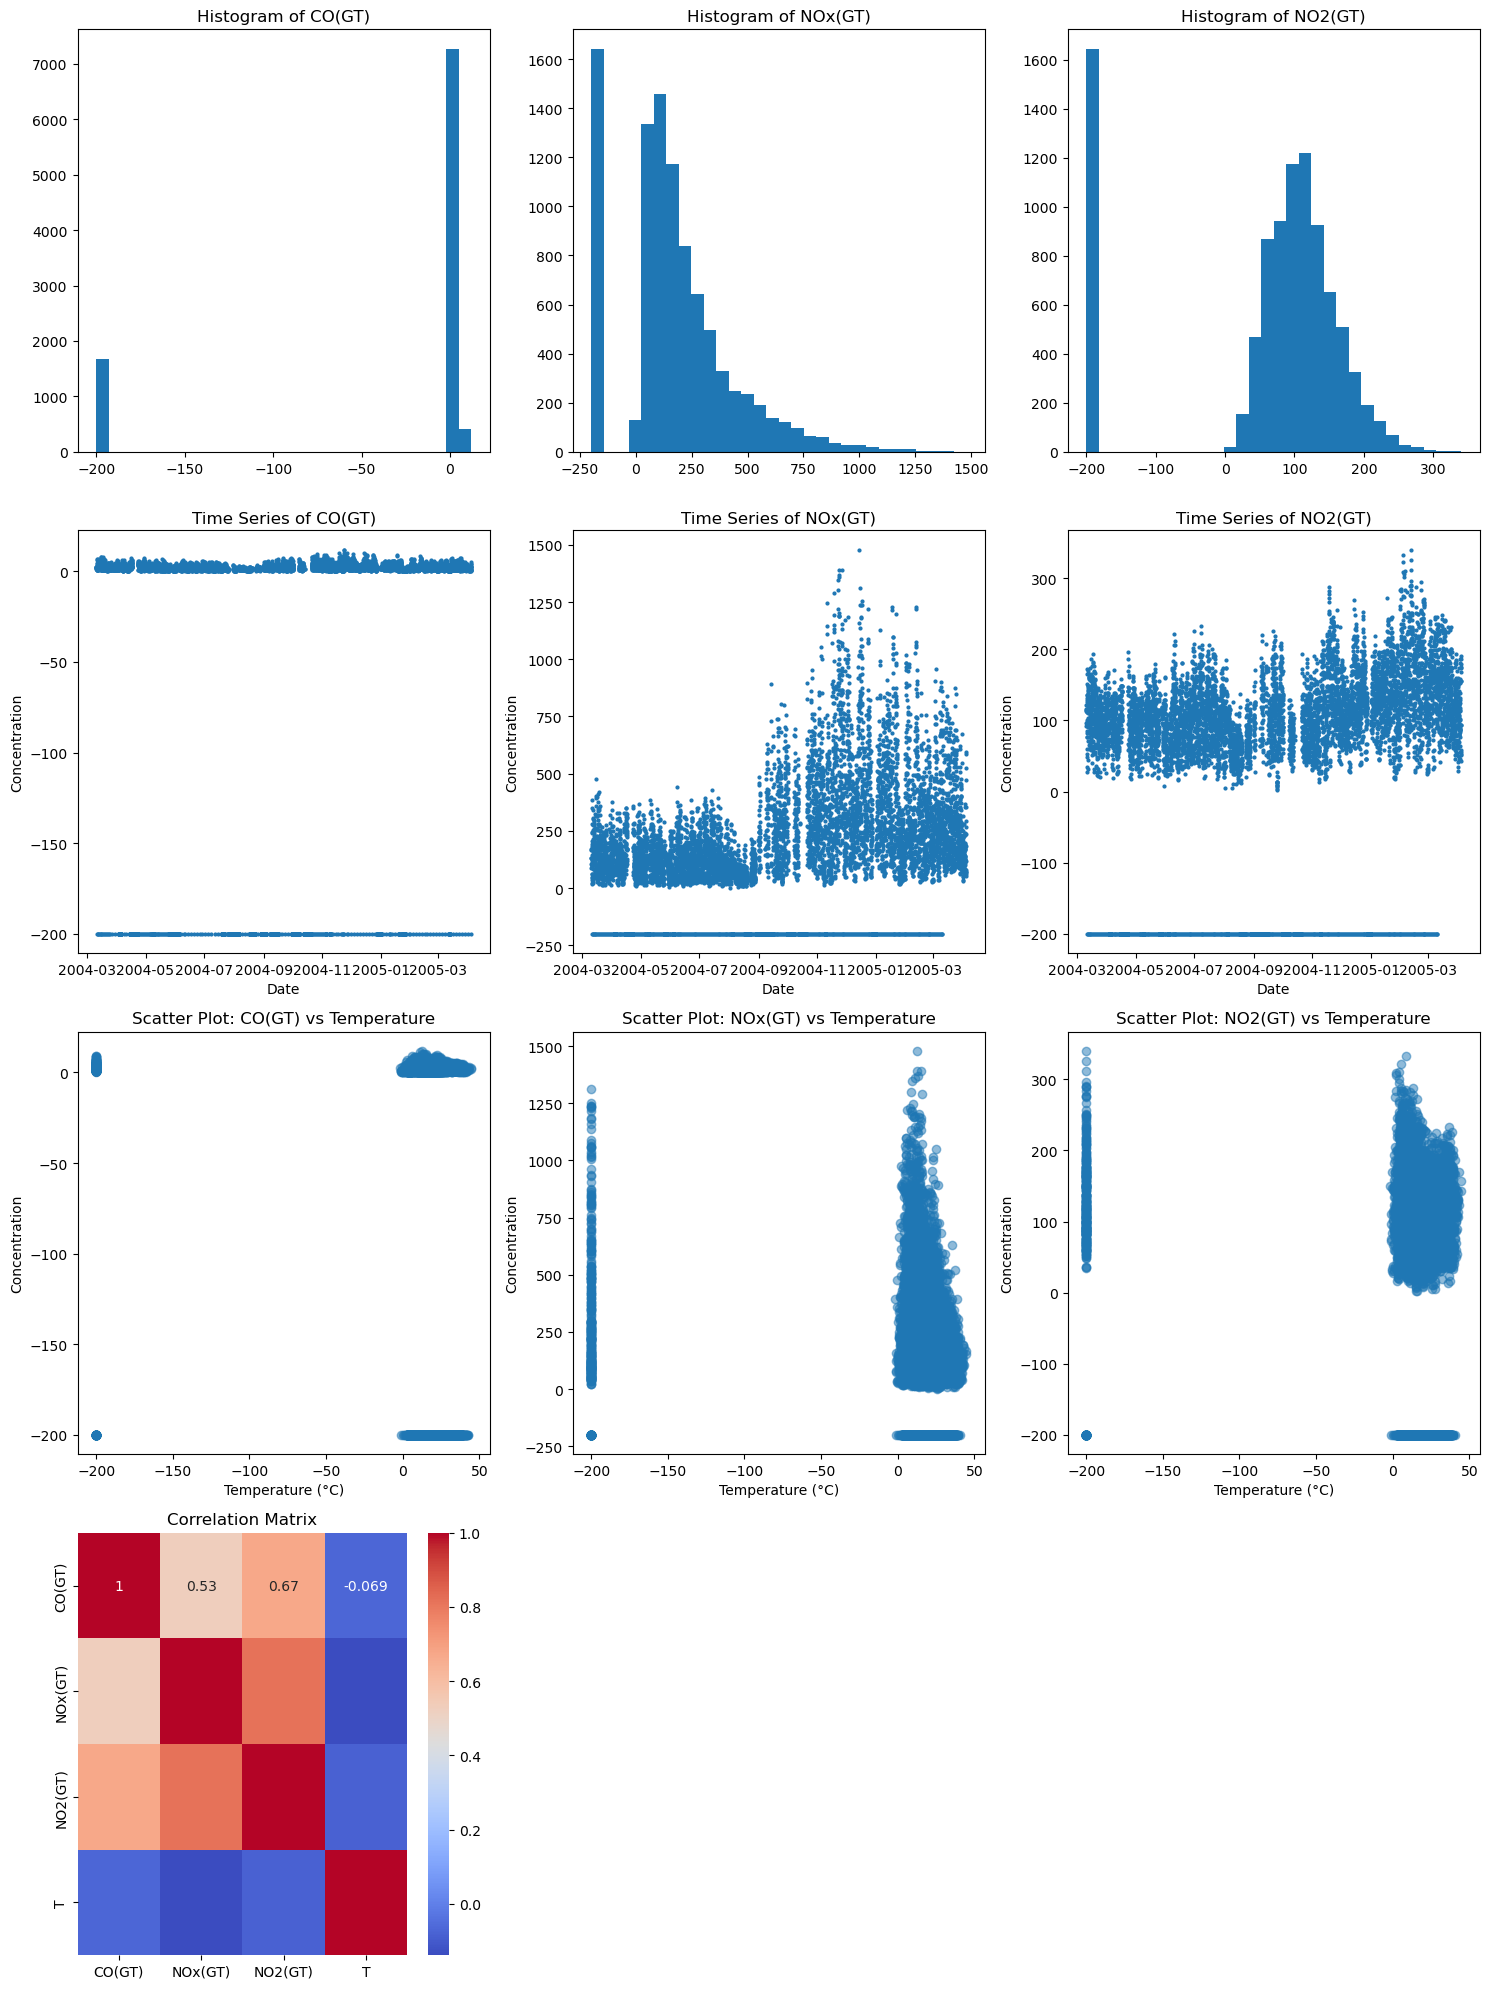

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

# Setting up the grid layout for visualizations
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Histograms for each pollutant
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']
for i, pollutant in enumerate(pollutants):
    axs[0, i].hist(air_quality_data[pollutant].dropna(), bins=30)
    axs[0, i].set_title(f'Histogram of {pollutant}')

# Time Series plot for each pollutant
for i, pollutant in enumerate(pollutants):
    axs[1, i].plot(air_quality_data['DateTime'], air_quality_data[pollutant], marker='o', linestyle='', markersize=2)
    axs[1, i].set_title(f'Time Series of {pollutant}')
    axs[1, i].set_xlabel('Date')
    axs[1, i].set_ylabel('Concentration')

# Scatter plot for each pollutant against Temperature
for i, pollutant in enumerate(pollutants):
    axs[2, i].scatter(air_quality_data['T'], air_quality_data[pollutant], alpha=0.5)
    axs[2, i].set_title(f'Scatter Plot: {pollutant} vs Temperature')
    axs[2, i].set_xlabel('Temperature (°C)')
    axs[2, i].set_ylabel('Concentration')

# Correlation Matrix Heatmap
corr_matrix = air_quality_data[pollutants + ['T']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axs[3, 0])
axs[3, 0].set_title('Correlation Matrix')
# Hiding empty subplots
for i in range(1, 3):
    axs[3, i].set_visible(False)

plt.tight_layout()
plt.show()



Based on the visualizations, here's an analysis of the trends and seasonality, outliers and anomalies, and correlations in the dataset:

#### Trends and Seasonality:
- The time series plots show variations in pollutant levels over time, although without a clear seasonal trend due to the limited timeframe displayed. However, there are noticeable fluctuations that could be indicative of short-term changes or specific events affecting air quality.
- The trends in pollutants do not exhibit a consistent pattern, suggesting the influence of various factors like weather conditions, traffic flow, industrial activities, or time of day on pollutant levels.

#### Outliers and Anomalies:
- In the histograms, the presence of values at the extreme ends suggests outliers. For example, very high concentration levels in some pollutants might indicate unusual pollution events or errors in data recording.
- The scatter plots also reveal points that deviate significantly from the general distribution, especially for NO2(GT). These points could represent atypical days with unusually high or low pollution levels, possibly due to specific local events or environmental conditions.

#### Correlations:
- The correlation matrix heatmap indicates that there are some correlations between pollutants and temperature, but they are not uniformly strong. This suggests that while temperature may influence pollutant levels, it is not the sole determining factor.
- Among the pollutants, there are moderate to strong correlations observed. For instance, NOx(GT) and NO2(GT) show some degree of positive correlation, which is plausible given their common sources like vehicle emissions and industrial activities.
- The scatter plots also visually support these correlations to some extent, showing how pollutants' concentrations vary with temperature, although the relationship does not appear to be linear or consistent across all pollutants.

# Section 4: Feature Engineering and Selection

In this section, we focus on feature engineering and selection, which are crucial steps in preparing our dataset for effective modeling. Feature engineering involves creating new features or modifying existing ones to improve the model's performance. Feature selection is about choosing the most relevant features for the model.

## Feature Engineering
1. **Time Features**: Since we have a datetime column, we can extract several time-related features that may influence pollutant levels, such as hour of the day, day of the week, and month. These features can capture daily and seasonal patterns in pollution.

In [6]:
# Creating time-related features
air_quality_data['hour'] = air_quality_data['DateTime'].dt.hour
air_quality_data['day_of_week'] = air_quality_data['DateTime'].dt.dayofweek
air_quality_data['month'] = air_quality_data['DateTime'].dt.month

2. **Lag Features**: For time series data, past values (lags) can be predictive of future ones. We can create lag features based on the pollutants, which may help in capturing trends and autocorrelation.

3. **Rolling Window Features**: These features, like rolling means or medians, can smooth out short-term fluctuations and highlight longer-term trends in pollutants.


In [7]:
lag_features = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

# Filling NaN values in lag features with the first non-NaN value in the column
for feature in lag_features:
    air_quality_data[f'{feature}_lag1'] = air_quality_data[feature].shift(1).fillna(method='bfill')

# Filling NaN values in rolling mean features with the mean of the available values
for feature in lag_features:
    air_quality_data[f'{feature}_rolling_mean'] = air_quality_data[feature].rolling(window=3, min_periods=1).mean()

In [8]:
# Displaying the head of the modified dataset to check the new features
air_quality_data[['DateTime', 'hour', 'day_of_week', 'month'] + 
                 [f'{p}_lag1' for p in pollutants] + 
                 [f'{p}_rolling_mean' for p in pollutants]].head()


# Displaying the head of the modified dataset to check the new features
air_quality_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),...,PT08.S1(CO)_rolling_mean,NMHC(GT)_rolling_mean,C6H6(GT)_rolling_mean,PT08.S2(NMHC)_rolling_mean,PT08.S3(NOx)_rolling_mean,PT08.S4(NO2)_rolling_mean,PT08.S5(O3)_rolling_mean,T_rolling_mean,RH_rolling_mean,AH_rolling_mean
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,...,1360.000000,150.000000,11.900000,1046.000000,1056.000000,1692.0,1268.000000,13.600000,48.900000,0.757800
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,...,1326.000000,131.000000,10.650000,1000.500000,1115.000000,1625.5,1120.000000,13.450000,48.300000,0.741650
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,...,1351.333333,116.666667,10.100000,980.000000,1123.333333,1602.0,1104.666667,12.933333,50.200000,0.744500
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,...,1356.666667,93.333333,9.200000,947.333333,1135.333333,1566.0,1083.000000,12.066667,53.900000,0.754133
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,...,1350.000000,73.000000,8.233333,907.666667,1145.666667,1543.0,1129.000000,11.366667,57.866667,0.775233


### Validation of 1NF (First Normal Form) for Air Quality Dataset

In [9]:
# Check for atomicity
atomicity_check = all(air_quality_data[col].apply(lambda x: isinstance(x, (int, float, str, pd.Timestamp))).all() for col in air_quality_data.columns)

# Check for unique column names
unique_column_names = len(air_quality_data.columns) == len(set(air_quality_data.columns))

# Check for uniqueness of rows
unique_rows = len(air_quality_data) == len(air_quality_data.drop_duplicates())

# Displaying checks
atomicity_check, unique_column_names, unique_rows


(True, True, True)

**Analyzing Newly Created Features**:
   - **Time-Related Features (hour, day_of_week, month)**: These features capture different temporal aspects that can influence pollutant levels. For instance, "hour" may reveal diurnal patterns, "day_of_week" can distinguish between weekdays and weekends, and "month" might highlight seasonal variations.
   - **Lag Features**: The lag features offer insight into the immediate historical context, potentially capturing short-term continuities in pollution levels.
   - **Rolling Window Features**: This feature provides a smoothed representation of pollutant levels, which can help identify more stable trends in the data.

## Feature Selection

Considering the newly engineered features, the selection of features for our predictive model will now be more inclusive:

- **Current Pollutant and Environmental Readings**: A subset of the original pollutant and environmental readings to capture the current air quality context.
- **Lag Features**: Key lag features for each pollutant and environmental variable, providing insights into the immediate past air quality conditions.
- **Rolling Window Features**: Selected rolling mean features for major pollutants to reflect longer-term trends and patterns.
- **Temporal Features**: 'hour', 'day_of_week', and 'month' to capture systematic temporal variations in air quality..

These selected features provide a holistic view of the air quality data, ensuring that the model captures not only the temporal aspects but also the complex relationships between different pollutants. This enriched feature set aims to enhance the model's accuracy in predicting air quality, offering a nuanced understanding of the factors influencing pollutant levels.

# Section 5: Building and testing the Regression Model

In this section, we delve into the construction and evaluation of a regression model for predicting NO2 levels, utilizing the features that were carefully selected and engineered.

#### Model Creation and Training
1. **Model Selection**: For our predictive task, we chose a Linear Regression model. This model is preferred for its simplicity, interpretability, and effectiveness.

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

2. **Feature and Target Variable Selection**: 
   - **Features**: We include features such as 'CO(GT)', 'NOx(GT)', 'T' (temperature), 'hour', 'day_of_week', 'month', 'NO2(GT)_lag1', and 'NO2(GT)_rolling_mean'.
   - **Target Variable**: Our goal is to predict 'NO2(GT)', a critical air pollutant.
  

#### Understanding Feature Selection
- The inclusion of 'NO2(GT)_lag1' and 'NO2(GT)_rolling_mean' is pivotal in capturing the temporal autocorrelation and trends in NO2 levels, which are crucial in time series forecasting. These features enable the model to learn from historical patterns and are combined with other environmental and temporal features for comprehensive prediction.

In [11]:
features = ['CO(GT)', 'NOx(GT)', 'T', 'hour', 'day_of_week', 'month', 'NO2(GT)_lag1', 'NO2(GT)_rolling_mean']
target = 'NO2(GT)'
X = air_quality_data[features]
y = air_quality_data[target]

### Preparing the Data
- We handle any residual missing values and split the dataset into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

# Handling missing values
X = X.dropna()
y = y.loc[X.index]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training the Model
- The Linear Regression model is then trained on the training set.

In [13]:
model.fit(X_train, y_train)

LinearRegression()

#### Model Evaluation
- The model is used to predict NO2 levels on the test set, and its performance is evaluated using key metrics.

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)

37.1492036282099
0.910481995824896


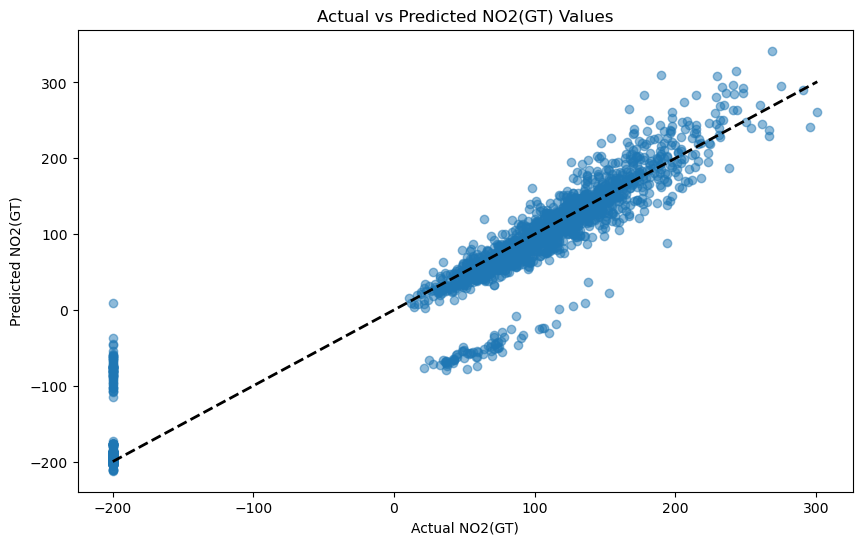

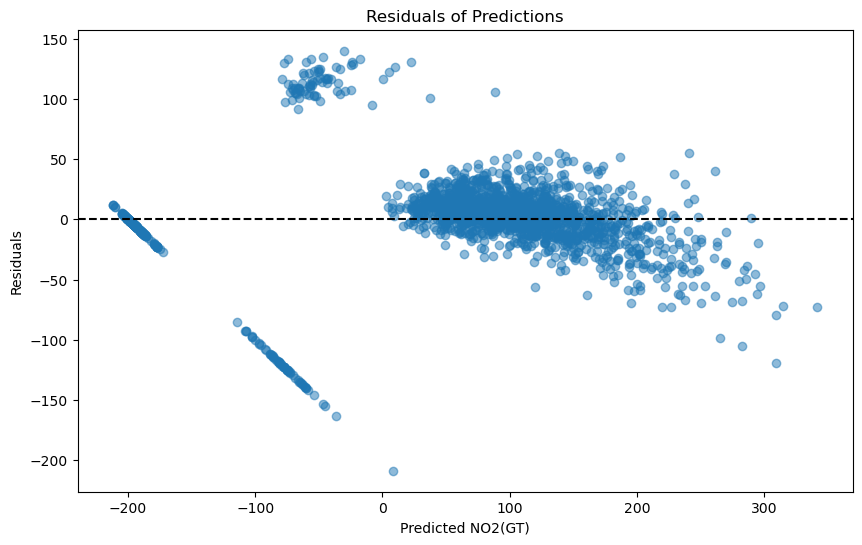

In [15]:
import matplotlib.pyplot as plt

# Scatter Plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual NO2(GT)')
plt.ylabel('Predicted NO2(GT)')
plt.title('Actual vs Predicted NO2(GT) Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line showing perfect predictions
plt.show()

# Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted NO2(GT)')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.axhline(y=0, color='k', linestyle='--')
plt.show()


#### Observations from Model Evaluation

- **Root Mean Squared Error (RMSE) and R² Score**: The RMSE for our model is approximately 37.15, and the R² score is around 0.910. While the R² score indicates a high level of variance explained by the model, the RMSE suggests there is notable deviation in the model's predictions from the actual values.

- **Actual vs Predicted Values Plot**: The scatter plot comparing the actual and predicted NO2 levels shows a generally good alignment, but with some scatter. While many data points are close to the line representing perfect predictions, there are areas where the predictions deviate from this line. This visualization supports the RMSE value, indicating the presence of prediction errors.

- **Residuals Plot**: Observing the residuals plot, where residuals are plotted against predicted values, we notice that the residuals are not perfectly randomly scattered around the zero line. Although many residuals are close to zero, indicating accurate predictions, there are also clusters and patterns away from the zero line. This pattern in residuals suggests areas where the model's predictive accuracy could be improved.

# Section 6: Conclusion
#### Reflection on Data Preprocessing and Feature Engineering
Throughout our comprehensive exploration of the air quality dataset, we've maintained rigorous data preprocessing standards, ensuring that our dataset conforms to First Normal Form (1NF) for optimal data integrity and a solid structural foundation. The meticulous feature engineering process has produced a robust set of features, including crucial time-related aspects, historical lag features, and rolling averages. These features have been instrumental in capturing the dynamic and complex nature of urban air quality data.

#### Model Performance and Insights into NO2 Levels
Our Linear Regression model has demonstrated notable predictive capabilities, with an R² score of approximately 0.910, signifying its strength in explaining the variability in NO2 levels. Yet, the Root Mean Squared Error (RMSE) of about 37.15 points to the existence of prediction errors. This RMSE value, juxtaposed with the R² score, illustrates the model's effectiveness and its limitations.

#### Visual Analysis and Predictive Behavior
The visual analysis, encompassing both scatter and residual plots, has provided a deeper understanding of the model's behavior. The scatter plot of actual versus predicted values shows a general alignment, indicating that the model can capture the trend in NO2 levels, but with noticeable deviations that account for the RMSE value. The residuals plot further highlights patterns and clusters, suggesting specific areas where the model's predictive accuracy could be enhanced.

#### Final Thoughts on NO2 Level Predictions and Future Directions
The insights derived from the model indicate a proficiency in capturing and predicting the general trends of NO2 levels, an important pollutant of concern in urban environments. To refine the model's accuracy, further exploration with sophisticated modeling techniques, additional features, and hyperparameter tuning would be beneficial.

# References

Air Quality Dataset. (2020, December 24). Kaggle. https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set

matplotlib.pyplot.scatter — Matplotlib 3.8.2 documentation. (n.d.). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

seaborn.heatmap — seaborn 0.13.1 documentation. (n.d.). https://seaborn.pydata.org/generated/seaborn.heatmap.html

Agrawal, R. (2022, August 1). Time-series Forecasting -Complete Tutorial | Part-1. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/07/time-series-forecasting-complete-tutorial-part-1/
